In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["axes.grid"] = True

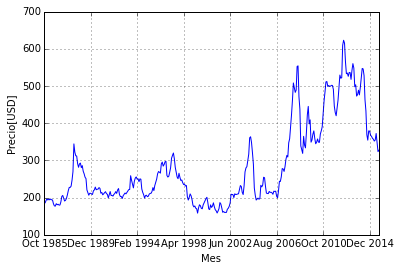

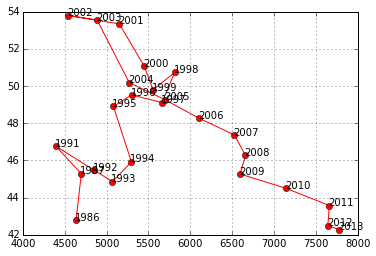

In [3]:
soy = pd.read_csv("soy.csv",delimiter="\t")
gini = pd.read_csv("gini.csv")
gdp = pd.read_csv("gdpcap.csv")
data = pd.concat([gdp,gini]).groupby("Country Name")

ax = soy.plot(x="Month",y="Price[USD]",legend=False)
ax.set_ylabel('Precio[USD]')
ax.set_xlabel("Mes")
data = pd.DataFrame(data.get_group("Argentina").iloc[:,5:-1].dropna(axis=1).T.reset_index().values, 
                    columns=["Date","GDP","GINI"], dtype=float)
plt.figure(2)
plt.plot(data.values[:,1],data.values[:,2],"ro-")
for i in data.values:
    plt.annotate(s=int(i[0]),xy=(i[1],i[2]))


# Estadísticas educativas

### Datos provenientes del GCBA http://data.buenosaires.gob.ar/dataset/estadistica-educativa

In [38]:
#Obtengo los datos directamente de la página web. No es necesario bajarlos!
educa = pd.read_csv(r"https://recursos-data.buenosaires.gob.ar/ckan2/estadistica-educativa/estadistica-educativa.csv", 
                    delimiter=";")
print(educa.shape) #Imprime la cantidad de filas primero, y después la cantidad de columnas
educa.head() #Imprime los 5 primeros datos

(308, 25)


,id,tipo_gestion,nivel_educ_madre,iecep,one_alto_cs_nat,one_bajo_cs_nat,one_medio_cs_nat,one_alto_cs_soc,one_bajo_cs_soc,one_medio_cs_soc,...,one_medio_mat,tasa_repeticion_2012,tasa_sobreedad_2012,tasa_sobreedad_avanzada_2012,promocionados_2011,salidos_sin_pase_2011,ive_2011,domiciliados_pba,extranjeros_2013,inversion_alumnos_2013
0,1,Privada,5.79,6.65855,0.290,0.097,0.613,0.519,0.037,0.444,...,0.615,16.50940,17.45280,2.35849,83.1818,1.29310,0.131480,0.0,5.17241,24340.9
1,2,Privada,6.25,6.43845,0.000,0.214,0.786,0.227,0.227,0.545,...,0.714,0.00000,60.14490,9.42029,61.7188,0.00000,0.076608,0.0,2.29008,26374.0
2,3,Privada,5.53,7.19646,0.300,0.025,0.675,0.561,0.073,0.366,...,0.561,2.06186,6.95876,2.06186,92.2078,2.78481,0.067712,0.0,4.63918,15561.5
3,4,Estatal,6.06,6.95247,0.265,0.229,0.506,0.463,0.053,0.484,...,0.671,3.27869,13.93440,1.31148,87.2659,1.65441,0.074672,3.5,5.87156,20568.4
4,5,Estatal,4.65,3.95331,0.054,0.518,0.429,0.182,0.109,0.709,...,0.547,21.49630,70.81140,44.36250,72.1358,20.14050,0.553109,17.4,10.75610,25034.3


In [39]:
#Imprimamos las columnas para saber los datos
educa.columns

Index(['id', 'tipo_gestion', 'nivel_educ_madre', 'iecep', 'one_alto_cs_nat',
       'one_bajo_cs_nat', 'one_medio_cs_nat', 'one_alto_cs_soc',
       'one_bajo_cs_soc', 'one_medio_cs_soc', 'one_alto_lengua',
       'one_bajo_lengua', 'one_medio_lengua', 'one_alto_mat', 'one_bajo_mat',
       'one_medio_mat', 'tasa_repeticion_2012', 'tasa_sobreedad_2012',
       'tasa_sobreedad_avanzada_2012', 'promocionados_2011',
       'salidos_sin_pase_2011', 'ive_2011', 'domiciliados_pba',
       'extranjeros_2013', 'inversion_alumnos_2013'],
      dtype='object')

En el archivo https://recursos-data.buenosaires.gob.ar/ckan2/estadistica-educativa/documentacion-estadistica-educativa.pdf indica el significado de cada columna. Vamos a tomar el nivel de educación de madre, la tasa de repetición, domiciliados PBA e inversión en alumnos como datos relevantes

In [40]:
features = ["nivel_educ_madre","iecep","tasa_repeticion_2012","domiciliados_pba","inversion_alumnos_2013"]

C:\Users\sadeus\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


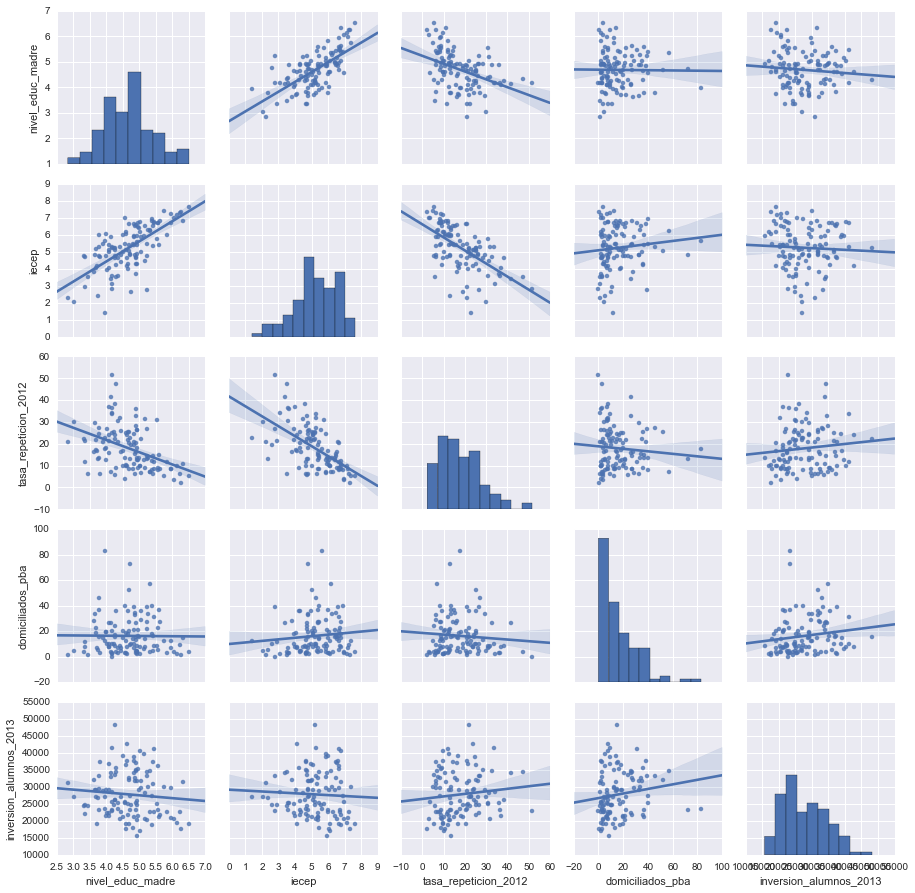

In [43]:
#Ahora, para analizar los datos, usamos el pairplot de seaborn, 
#que te permite hacer histogramas 2d y agregarle una regresión lineal
sns.pairplot(educa[educa.tipo_gestion == "Estatal"], 
             vars=features, kind="reg")